In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from pyLIMA.outputs import pyLIMA_plots
from cycler import cycler
import pandas as pd
sys.path.append(os.path.dirname(os.getcwd()))
from functions_roman_rubin import sim_fit,sim_event
from functions_roman_rubin import model_rubin_roman, fit_rubin_roman
from functions_roman_rubin import read_data, save

/home/anibal-pc/roman_rubin


In [2]:
current_path = os.path.dirname(os.getcwd())
# print(current_path)
i=18#18 #select one event by its index in the TRILEGAL set
model='USBL'

path_TRILEGAL_set= current_path+'/TRILEGAL/PB_planet_split_1.csv'
path_to_save_model= current_path+'/test_sim_fit/'
path_to_save_fit= current_path+'/test_sim_fit/'
path_ephemerides= current_path+'/ephemerides/Gaia.txt'
path_dataslice = current_path+'/opsims/baseline/dataSlice.npy'
path_fit_rr = path_to_save_fit+f'/Event_RR_{i}_TRF.npy'
path_fit_roman =  path_to_save_fit+f'/Event_Roman_{i}_TRF.npy'
ZP = {'W149':27.615, 'u':27.03, 'g':28.38, 'r':28.16,
          'i':27.85, 'z':27.46, 'y':26.68}
colorbands={'W149':'b', 'u':'purple', 'g':'g', 'r':'red',
          'i':'yellow', 'z':'k', 'y':'cyan'}

### The event that we want to simulate have the following parameters

In [3]:
pd_planets = pd.read_csv(path_TRILEGAL_set)
event_params = pd_planets.iloc[int(i)]
print(event_params)


u                                  24.853
g                                   22.55
r                                  21.529
i                                  21.133
z                                  20.945
Y                                  20.828
W149                              20.8178
radius                           0.513042
D_S                                  5156
D_L                                  2817
mu_rel                           5.147491
m_planet    9.462530108421484 jupiterMass
m_star          18.65259824621826 solMass
t0                         2462592.427461
te                             351.034363
u0                               0.147437
rho                              0.000094
piEE                            -0.032015
piEN                             0.005886
s                                 1.14786
q                                0.000484
alpha                            2.170221
Name: 18, dtype: object


## First we simulate the event 
The relevant code for this is the function sim_event(i, event_params, path_ephemerides, path_dataslice, model).

The output:

model(eg: pyLIMA.models.USBL_model.USBLmodel): the light curves, telescope name, etc.  
pyLIMA_parameters (dictionary): PyLIMA parameters.
decision (boolean): is made based on the detection criteria. This boolean is True if the event is a suitable candidate for fitting.

## Plot this event with pyLIMA

We can use the functionality of pyLIMA to make plot with aligned data in order to see the peak asociated to a planet of this particular event

Comment on pyLIMA:

To plot these events, since in our model we use the positions of Gaia with a shift in time,
it is necessary to modify the pyLIMA code as follows:

 In /pyLIMA/toolbox/fake_telescopes.py, we must add 'spacecraft_positions' to the list
 in the function:

 replicate_a_telescope(microlensing_model, telescope_index, light_curve_time=None,
                        astrometry_curve_time=None):

 attributes_to_copy = ['name', 'filter', 'location', 'ld_gamma', 'ld_sigma', 'ld_a1',
                       'ld_a2', 'ld_gamma1', 'ld_gamma2', 'location', 'spacecraft_name',
                       'spacecraft_positions', 'pixel_scale']



In [4]:
info_dataset, pyLIMA_parameters, bands = read_data(path_to_save_model+'/Event_'+str(int(i))+'.h5')
ulens_params = []
PAR = ['t_center','u_center','tE','rho','separation','mass_ratio','alpha','piEN','piEE']

for b in (PAR):
    ulens_params.append(pyLIMA_parameters[b])
flux_params = []

# Here we change the zero point to the pyLIMA convention in order to make the alignment
for b in bands:
    if not len(bands[b])==0:
        zp_Rubin_to_pyLIMA = (10**((-27.4+ZP[b])/2.5))
        
        flux_params.append(pyLIMA_parameters['fsource_'+b]/zp_Rubin_to_pyLIMA)
        flux_params.append(pyLIMA_parameters['ftotal_'+b]/zp_Rubin_to_pyLIMA)
        
true_params = ulens_params+flux_params


In [5]:
model_ulens = 'USBL'

Source = i
event_params = pyLIMA_parameters
event_params['te']=event_params['tE']
event_params['s']=event_params['separation']
event_params['q']=event_params['mass_ratio']

f= 'W149'
wfirst_lc = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'u'
lsst_u = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='g'
lsst_g = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='r'
lsst_r = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='i'
lsst_i = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='z'
lsst_z = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='y'
lsst_y = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T

model_true = model_rubin_roman(Source,True,event_params, path_ephemerides,model_ulens, wfirst_lc, lsst_u, lsst_g, lsst_r, lsst_i, lsst_z,
                    lsst_y)


check_event  : Everything looks fine...


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 20736 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 20736 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning:

Parallax(Full) estimated for the telescope W149: SUCCESS
Parallax(Full) estimated for the telescope g: SUCCESS
Parallax(Full) estimated for the telescope r: SUCCESS
Parallax(Full) estimated for the telescope i: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 96 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 86 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 86 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 86 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERF

In [6]:

if len(true_params) != len(model_true.model_dictionnary):
    telescopes_fluxes = model_true.find_telescopes_fluxes(true_params)
    telescopes_fluxes = [getattr(telescopes_fluxes, key) for key in
                         telescopes_fluxes]#._fields]
    model_parameters3 = np.r_[true_params, telescopes_fluxes]
else:
    model_parameters3 = true_params


In [7]:
# fig, axes = plt.subplots(1, 1,figsize=(8,6))

# axes.set_ylabel("Magnitude",fontsize=20)
# axes.set_xlabel("Time",fontsize=20)
# axes.grid(True, color='0.95')
# axes.invert_yaxis()
# # axes.set_title('Simulated event')

# pyLIMA_plots.plot_photometric_models(axes, model_true, true_params, plot_unit='Mag')
# pyLIMA_plots.plot_aligned_data(axes, model_true, true_params, plot_unit='Mag')
# colors = ['darkslategray', 'gray', 'lightgray']

# axes.legend(shadow=True, fontsize='large',
#                           bbox_to_anchor=(0, 1.02, 1, 0.2),
#                           loc="lower left",
#                           mode="expand", borderaxespad=0, ncol=3)
# plt.show()


In [8]:
# from bokeh.plotting import figure, show
# # Create a Bokeh figure
# bokeh_plot = figure(
#     width=800*2, height=400*2,
#     title="Microlensing Photometric Models",
#     x_axis_label="Time",
#     y_axis_label="Magnitude",
#     tools="pan,wheel_zoom,box_zoom,reset"
# )

# # Call the function to plot the photometric models
# pyLIMA_plots.plot_photometric_models(
#     figure_axe=None,  # Pass None if you're only using Bokeh
#     microlensing_model=model_true,
#     model_parameters=true_params,
#     bokeh_plot=bokeh_plot,
#     plot_unit='Mag'
# )

# pyLIMA_plots.plot_aligned_data(figure_axe=None,  # Pass None if you're only using Bokeh
#     microlensing_model=model_true,
#     model_parameters=true_params,
#     bokeh_plot=bokeh_plot,
#     plot_unit='Mag'
# )
# bokeh_plot.y_range.flipped = True
# show(bokeh_plot)

In [9]:

fit_rr = np.load(current_path+'/test_interval_width/Event_RR_8_TRF.npy',allow_pickle=True).item()
chi2_rr = fit_rr['chi2']
DOF_rr = sum([len(bands[f]) for f in bands])-len(fit_rr['best_model'])


#metric alpha
alpha_rr = (abs(np.array(true_params[0:len(fit_rr['best_model'])])-fit_rr['best_model'])/np.array(true_params[0:len(fit_rr['best_model'])]))[0:9]
#metric beta
beta_rr = (abs(np.array(true_params[0:len(fit_rr['best_model'])])-fit_rr['best_model'])/np.sqrt(np.diag(fit_rr['covariance_matrix'])))[0:9]
#metric gamma
gamma_rr = (np.sqrt(np.diag(fit_rr['covariance_matrix']))/np.array(true_params[0:len(fit_rr['best_model'])]))[0:9]


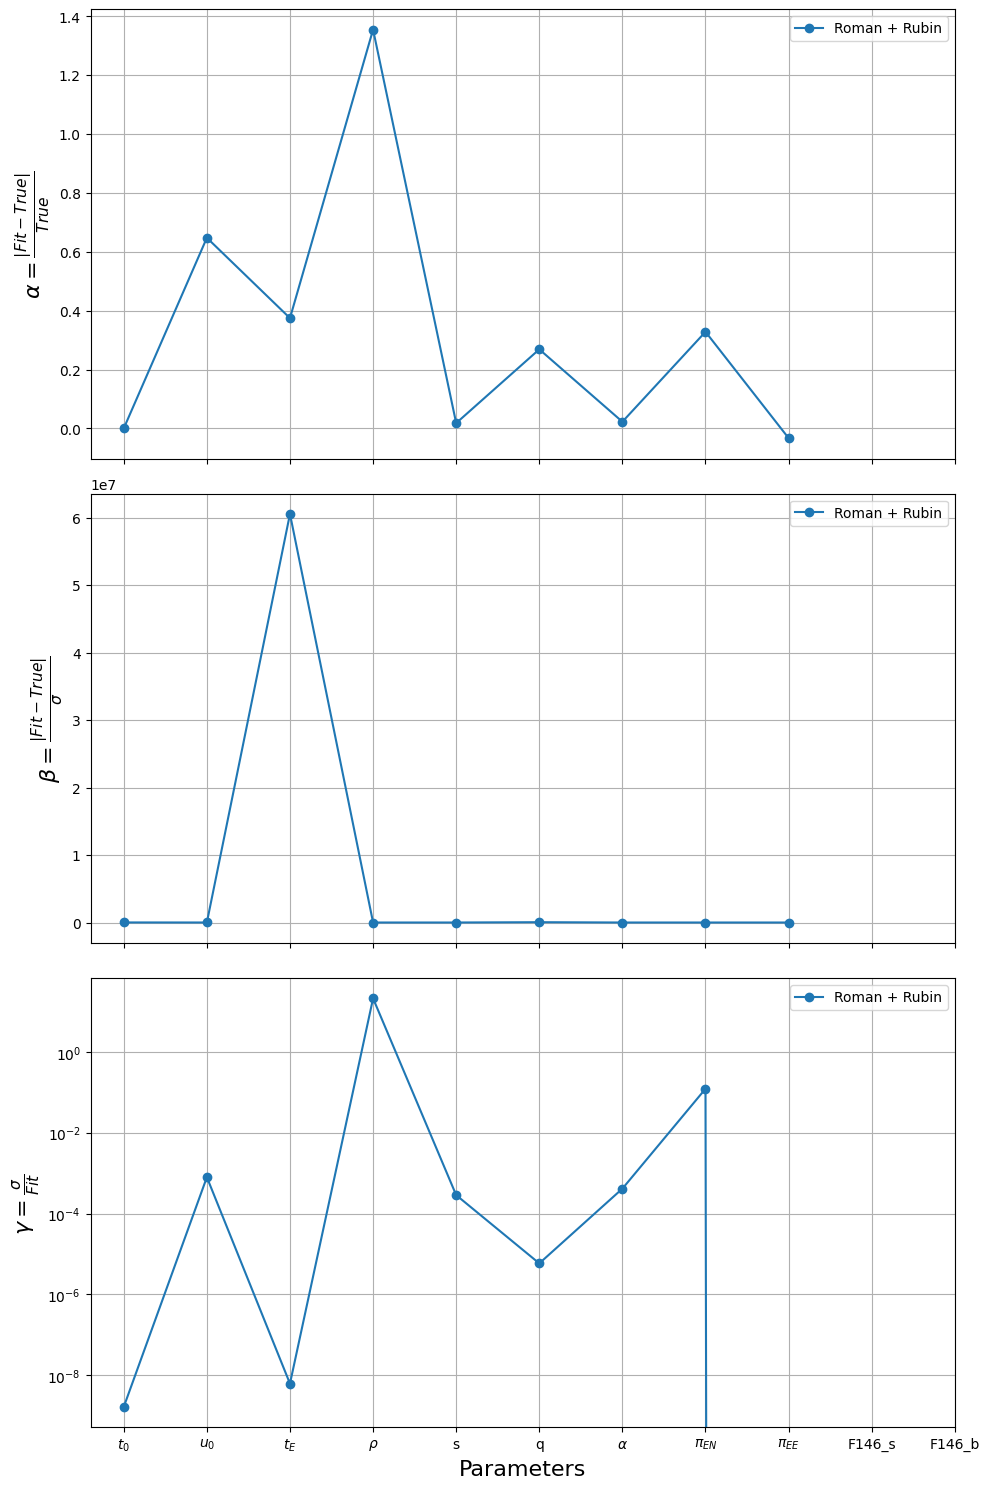

In [10]:
# Parameter labels
xticks = [r'$t_0$', r'$u_0$', r'$t_E$', r'$\rho$', 's', 'q', r'$\alpha$', r'$\pi_{EN}$', r'$\pi_{EE}$', 'F146_s', 'F146_b']

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plot alpha
# axs[0].plot(alpha_roman, marker='o', label='Roman')
axs[0].plot(alpha_rr, marker='o', label='Roman + Rubin')
axs[0].set_ylabel(r'$\alpha = \frac{|Fit-True|}{True}$', fontsize=16)
# axs[0].axhline(rango,lw=2,ls='-')
axs[0].legend()
axs[0].grid(True)

# Plot beta
# axs[1].plot(beta_roman, marker='o', label='Roman')
axs[1].plot(beta_rr, marker='o', label='Roman + Rubin')
axs[1].set_ylabel(r'$\beta =\frac{|Fit-True|}{\sigma}$', fontsize=16)
axs[1].legend()
axs[1].grid(True)

# Plot gamma
# axs[2].plot(gamma_roman, marker='o', label='Roman')
axs[2].plot(gamma_rr, marker='o', label='Roman + Rubin')
axs[2].set_ylabel(r'$\gamma =\frac{\sigma}{Fit}$', fontsize=16)
axs[2].legend()
axs[2].set_yscale('log')
axs[2].grid(True)

# Shared x-axis
axs[0].set_xticks(ticks=range(len(xticks)), labels=xticks, rotation=45, fontsize=12)

axs[2].set_xlabel('Parameters', fontsize=16)
plt.tight_layout()
plt.show()


In [11]:
pyLIMAmodel_rr = model_rubin_roman(18, False, event_params, path_ephemerides, 'USBL', wfirst_lc, lsst_u, lsst_g, lsst_r, lsst_i, lsst_z, lsst_y)
# just a re-definition
model_rr = pyLIMAmodel_rr
# model_roman = pyLIMAmodel_roman

# data_fit_roman = fit_roman.fit_results
data_fit_rr = fit_rr

check_event  : Everything looks fine...


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 20736 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 20736 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Parallax(Full) estimated for the telescope W149: SUCCESS
Parallax(Full) estimated for the telescope g: SUCCESS
Parallax(Full) estimated for the telescope r: SUCCESS
Parallax(Full) estimated for the telescope i: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 96 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 96 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA 

In [12]:

# for telo in pyLIMAmodel_rr.event.telescopes:
    # print(telo.lightcurve_magnitude['time'])

In [13]:
fit_rr['best_model']

[2462553.5654954007,
 0.24288893679234136,
 482.496294970695,
 -3.316601909049971e-05,
 1.16846431238426,
 0.0003541777197891326,
 2.121243541593921,
 0.003954578308422073,
 -0.030959956804785683,
 183.98620075726802,
 427.76730213471933,
 33.41573192264114,
 86.64552502710379,
 134.4501661382147,
 222.59059137157206,
 126.5742341699077,
 320.28057128093275,
 160.4759142133541,
 380.1797448064979,
 160.47591420384575,
 380.1797447995005]

In [14]:
def flux_to_mag(zp, Flux):
    '''
    Transform the flux to magnitude
    inputs
    zp: zero point
    Flux: vector that contains the lightcurve flux
    '''
    return zp - 2.5 * np.log10(abs(Flux))


W149
41568
g
191
r
197
i
195
z
176
y
55
W149
41568
u
0
g
191
r
197
i
195
z
176
y
55


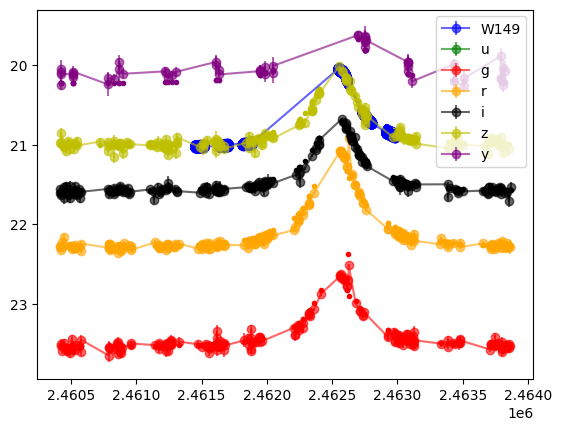

In [15]:
# compute chi^2
from pyLIMA.simulations import simulator
fit_rr['best_model'] = [2462553.5654954007,
 0.24288893679234136,
 482.496294970695,
 abs(-3.316601909049971e-05),
 1.16846431238426,
 0.0003541777197891326,
 2.121243541593921,
 0.003954578308422073,
 -0.030959956804785683,
 183.98620075726802,
 427.76730213471933,
 33.41573192264114,
 86.64552502710379,
 134.4501661382147,
 222.59059137157206,
 126.5742341699077,
 320.28057128093275,
 160.4759142133541,
 380.1797448064979,
 160.47591420384575,
 380.1797447995005]
pyLIMAmodel_rr
pyLIMA_par_fit = pyLIMAmodel_rr.compute_pyLIMA_parameters(fit_rr['best_model'])
simulator.simulate_lightcurve_flux(pyLIMAmodel_rr, pyLIMA_par_fit)

# pyLIMA_par_fit

for k in range(1, len(pyLIMAmodel_rr.event.telescopes)):
    model_flux = pyLIMAmodel_rr.compute_the_microlensing_model(pyLIMAmodel_rr.event.telescopes[k],
                                                             pyLIMA_par_fit)['photometry']
    pyLIMAmodel_rr.event.telescopes[k].lightcurve_flux['flux'] = model_flux


colors = {'W149':'b',
'u':'g',
'g':'r',
'r':'orange',
'i':'k',
'z':'y',
'y':'purple'
}

for telo in pyLIMAmodel_rr.event.telescopes:
    print(telo.name)
    # A = pyLIMAmodel_rr.model_magnification(telo, pyLIMA_par_fit)
    
    # if len(telo.lightcurve_magnitude['time'])==len(A):
        # plt.plot(telo.lightcurve_magnitude['time'], A, ls=' ', marker='.')
    # print(ZP[telo.name])
    print(len(telo.lightcurve_magnitude['time']))
    plt.plot(telo.lightcurve_magnitude['time'], flux_to_mag(ZP[telo.name],telo.lightcurve_flux['flux']), color=colors[telo.name],ls=' ', marker='.')
        # plt.plot(telo.lightcurve_magnitude['time'],np.log(pspl_lightcurve(t0, u0, tE, telo.lightcurve_magnitude['time'].value)-1),color='red',lw=2,alpha=0.2, marker='.',ls='--')

for b in bands:
    print(b)
    print(len(bands[b]['time']))
    plt.errorbar(bands[b]['time'],bands[b]['mag']-27.4+ZP[b],bands[b]['err_mag'], color=colors[b], marker= 'o',alpha=0.6, label = b)

plt.legend()
plt.gca().invert_yaxis()

In [68]:
pyLIMAmodel_rr.event.telescopes[0].name

'W149'

In [73]:
b = 'i'
index={'W149':0,'g':1,'r':2,'i':3,'z':4,'y':5}
model = flux_to_mag(ZP[b],pyLIMAmodel_rr.event.telescopes[index[b]].lightcurve_flux['flux'])
data = bands[b]['mag']-27.4+ZP[b]
error = bands[b]['err_mag']

sum(((model-data)/error)**2)/(len(data)-9-12)

2.6796428358279876

## Plot fitted events

In this event I saw some structure in the residuals that indicate that the model is not fitting the data

In [17]:
# plt.close('all')


# if len(data_fit_rr['best_model']) != len(model_rr.model_dictionnary):
#     telescopes_fluxes = model_rr.find_telescopes_fluxes(data_fit_rr['best_model'])
#     telescopes_fluxes = [telescopes_fluxes[key] for key in
#                          telescopes_fluxes]#._fields]
#     model_parameters1 = np.r_[data_fit_rr['best_model'], telescopes_fluxes]
# else:
#     model_parameters1 = data_fit_rr['best_model']


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 110690 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 110690 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Parallax(Full) estimated for the telescope W149: SUCCESS


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 92855 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 92855 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 92855 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Parallax(Full) estimated for the telescope g: SUCCESS


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 92359 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 92359 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Parallax(Full) estimated for the telescope W149: SUCCESS


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 72648 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 72648 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 72648 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Parallax(Full) estimated for the telescope g: SUCCESS
Parallax(Full) estimated for the telescope W149: SUCCESS


KeyboardInterrupt: 

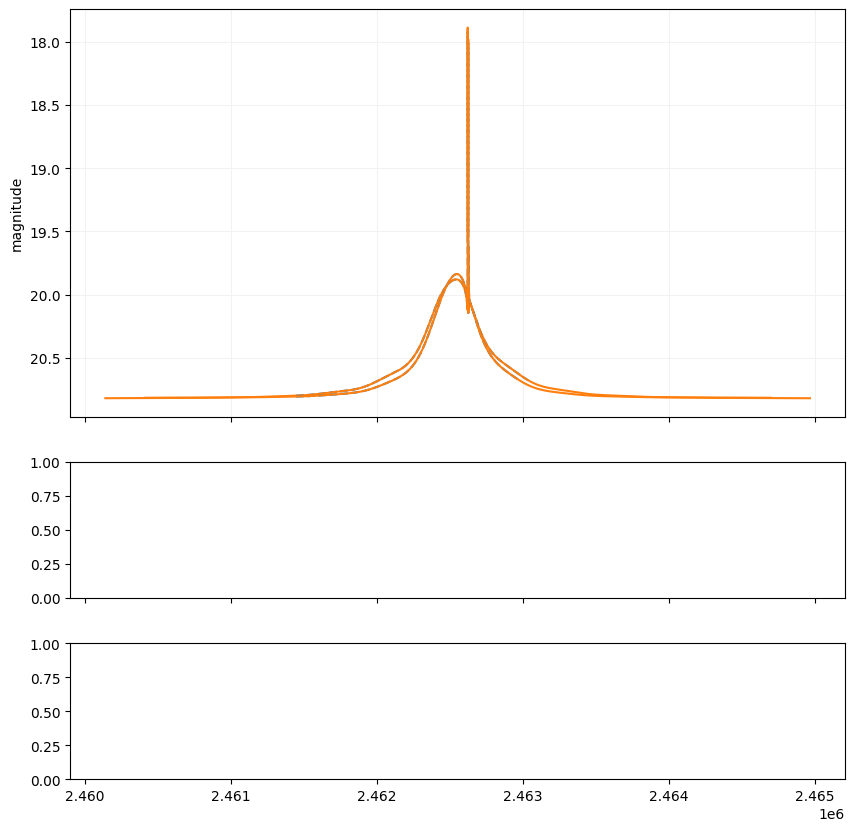

In [18]:
%matplotlib inline
fig, axes = plt.subplots(3, 1,figsize=(10,10), height_ratios=[3, 1,1], sharex=True)

# Lc plot
axes[0].set_ylabel("magnitude") 
axes[0].grid(True, color='0.95')
axes[0].invert_yaxis()

#Plot model1 and align data to it
pyLIMA_plots.plot_photometric_models(axes[0], model_rr, data_fit_rr['best_model'], plot_unit='Mag')
pyLIMA_plots.plot_photometric_models(axes[0], model_true, true_params, plot_unit='Mag')
# pyLIMA_plots.plot_photometric_models(axes[0], model_true, true_params, plot_unit='Mag')
pyLIMA_plots.plot_aligned_data(axes[0], model_rr, data_fit_rr['best_model'], plot_unit='Mag')
colors = ['darkslategray', 'gray', 'lightgray']

# plot residuals
axes[1].set_ylabel("$\Delta m_{RR} $") 
axes[1].grid(True, color='0.95')
axes[2].set_ylabel("$\Delta m_{Roman} $") 
axes[2].grid(True, color='0.95')

# pyLIMA_plots.plot_residuals(axes[1], model_rr, data_fit_rr['best_model'], plot_unit='Mag')
pyLIMA_plots.plot_residuals(axes[2], model_true, true_params, plot_unit='Mag')
axes[1].set_ylim(-2.5, 1)
axes[1].axhline(y=0)

axes[0].legend(shadow=True, fontsize='large',
                          bbox_to_anchor=(0, 1.02, 1, 0.2),
                          loc="lower left",
                          mode="expand", borderaxespad=0, ncol=3)

plt.show()


In [ ]:
# simulator.simulate_lightcurve_flux(model_rr, data_fit_rr['best_model'])
